# Import Packages

In [1]:
from LevyPlot import Scan2D
from LevyPlot import Scan3D
from LevyPlot import ProcessandPlot

In [2]:
import os
import shutil
import re
import math
import numpy as np
import pandas as pd

import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
pio.renderers.default = "notebook"
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 14}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 0.8
matplotlib.rcParams["figure.dpi"] = 600

from scipy import signal
from scipy.optimize import curve_fit
from scipy import polyfit
import random

import json
from nptdms import TdmsWriter, RootObject, GroupObject, ChannelObject, TdmsFile
from tqdm import tqdm
from datetime import datetime
import pickle
from sklearn.cluster import KMeans

# Create Scan3D Object and Specify Measurement Parameters

In [3]:
experiment = Scan3D(folder = '06-Sweep T B IV',
                    metadata = dict(scantype = 'IV',
                                    groupsize = 10,
                                    monodirection = 'monodown',
                                    convertfilename = False,
                                    convertparam = dict(start = 0,
                                                        step = 1),
                                    dataofinterest = ['Magnet', 'Temperature', 'AO6', 'AI2', 'AI7', 'AI4', 'AO5'],
                                    outmostsweepchannel = 'Temperature',
                                    outersweepchannel = 'Magnet',
                                    innersweepchannel = 'AO6',
                                    source = 'AO6',
                                    sourceamp = 0.000,
                                    Vplus = 'AI4',
                                    Vminus = 'AI4',
                                    Iminus = 'AI2'))

# Open Tdms file and Read Data

In [ ]:
# experiment.loadFromPickles()

In [4]:
experiment.openTdms()

In [5]:
experiment.tdmsToAveragedMonoDfConcatenated()

Reading from TdmsFile to Pandas Dataframe


100%|██████████| 825/825 [00:37<00:00, 16.63it/s]


In [6]:
experiment.scanall.monodfconcatenated

datapoint  Temperature       AO6           AI2       AI7       AI4  \
Magnet                                                                          
-0.299966     1707.0     0.099498 -0.012995 -9.025214e-08 -0.000130 -0.000216   
-0.299966     1706.0     0.099498 -0.012984 -9.007617e-08 -0.000130 -0.000215   
-0.299966     1705.0     0.099498 -0.012963 -8.990809e-08 -0.000130 -0.000215   
-0.299966     1704.0     0.099498 -0.012942 -8.975326e-08 -0.000129 -0.000215   
-0.299966     1703.0     0.099498 -0.012922 -8.962912e-08 -0.000129 -0.000214   
-0.299966     1702.0     0.099498 -0.012901 -8.949730e-08 -0.000129 -0.000214   
-0.299966     1701.0     0.099498 -0.012880 -8.934502e-08 -0.000129 -0.000213   
-0.299966     1700.0     0.099498 -0.012845 -8.904783e-08 -0.000128 -0.000213   
-0.299966     1699.0     0.099498 -0.012824 -8.890196e-08 -0.000128 -0.000212   
-0.299966     1698.0     0.099498 -0.012803 -8.877697e-08 -0.000128 -0.000212   
-0.299966     1697.0     0.099498 -0.012782 -8.865064e-08 -0.000128 -0.000212   
-0.299966     1696.0     0.099498 -0.012762 -8.850289e-08 -0.000128 -0.000211   
-0.299966     1695.0     0.099498 -0.012741 -8.833915e-08 -0.000127 -0.000211   
-0.299966     1694.0     0.099498 -0.012720 -8.818977e-08 -0.000127 -0.000211   
-0.299966     1693.0     0.099498 -0.012685 -8.794100e-08 -0.000127 -0.000210   
-0.299966     1692.0     0.099498 -0.012664 -8.778785e-08 -0.000126 -0.000210   
-0.299966     1691.0     0.099498 -0.012643 -8.765199e-08 -0.000126 -0.000209   
-0.299966     1690.0     0.099498 -0.012622 -8.748508e-08 -0.000126 -0.000209   
-0.299966     1689.0     0.099498 -0.012602 -8.732695e-08 -0.000126 -0.000209   
-0.299966     1688.0     0.099498 -0.012581 -8.717853e-08 -0.000126 -0.000208   
-0.299966     1687.0     0.099498 -0.012560 -8.703223e-08 -0.000125 -0.000208   
-0.299966     1686.0     0.099498 -0.012525 -8.680352e-08 -0.000125 -0.000207   
-0.299966     1685.0     0.099498 -0.012504 -8.665285e-08 -0.000125 -0.000207   
-0.299966     1684.0     0.099498 -0.012483 -8.651483e-08 -0.000125 -0.000206   
-0.299966     1683.0     0.099498 -0.012462 -8.633624e-08 -0.000124 -0.000206   
-0.299966     1682.0     0.099498 -0.012442 -8.619036e-08 -0.000124 -0.000206   
-0.299966     1681.0     0.099498 -0.012421 -8.606269e-08 -0.000124 -0.000205   
-0.299966     1680.0     0.099498 -0.012400 -8.592153e-08 -0.000124 -0.000205   
-0.299966     1679.0     0.099498 -0.012365 -8.565334e-08 -0.000123 -0.000204   
-0.299966     1678.0     0.099498 -0.012344 -8.549207e-08 -0.000123 -0.000204   
...              ...          ...       ...           ...       ...       ...   
 0.189964      599.0     0.700050  0.012317  8.760917e-08  0.000133  0.000214   
 0.189964      598.0     0.700050  0.012338  8.776324e-08  0.000133  0.000214   
 0.189964      597.0     0.700050  0.012358  8.792002e-08  0.000133  0.000215   
 0.189964      596.0     0.700050  0.012379  8.805738e-08  0.000134  0.000215   
 0.189964      595.0     0.700050  0.012400  8.818608e-08  0.000134  0.000215   
 0.189964      594.0     0.700050  0.012435  8.841658e-08  0.000134  0.000216   
 0.189964      593.0     0.700050  0.012456  8.857310e-08  0.000134  0.000216   
 0.189964      592.0     0.700050  0.012477  8.875186e-08  0.000135  0.000217   
 0.189964      591.0     0.700050  0.012498  8.890348e-08  0.000135  0.000217   
 0.189964      590.0     0.700050  0.012518  8.903691e-08  0.000135  0.000217   
 0.189964      589.0     0.700050  0.012539  8.917023e-08  0.000135  0.000218   
 0.189964      588.0     0.700050  0.012560  8.931410e-08  0.000135  0.000218   
 0.189964      587.0     0.700050  0.012595  8.961128e-08  0.000136  0.000219   
 0.189964      586.0     0.700050  0.012616  8.974351e-08  0.000136  0.000219   
 0.189964      585.0     0.700050  0.012637  8.986634e-08  0.000136  0.000219   
 0.189964      584.0     0.700050  0.012658  8.999889e-08  0.000137  0.000220   
 0.189964      583.0     0.700050  0.01267

## self.scanall is a Scan2D object that contains all the data

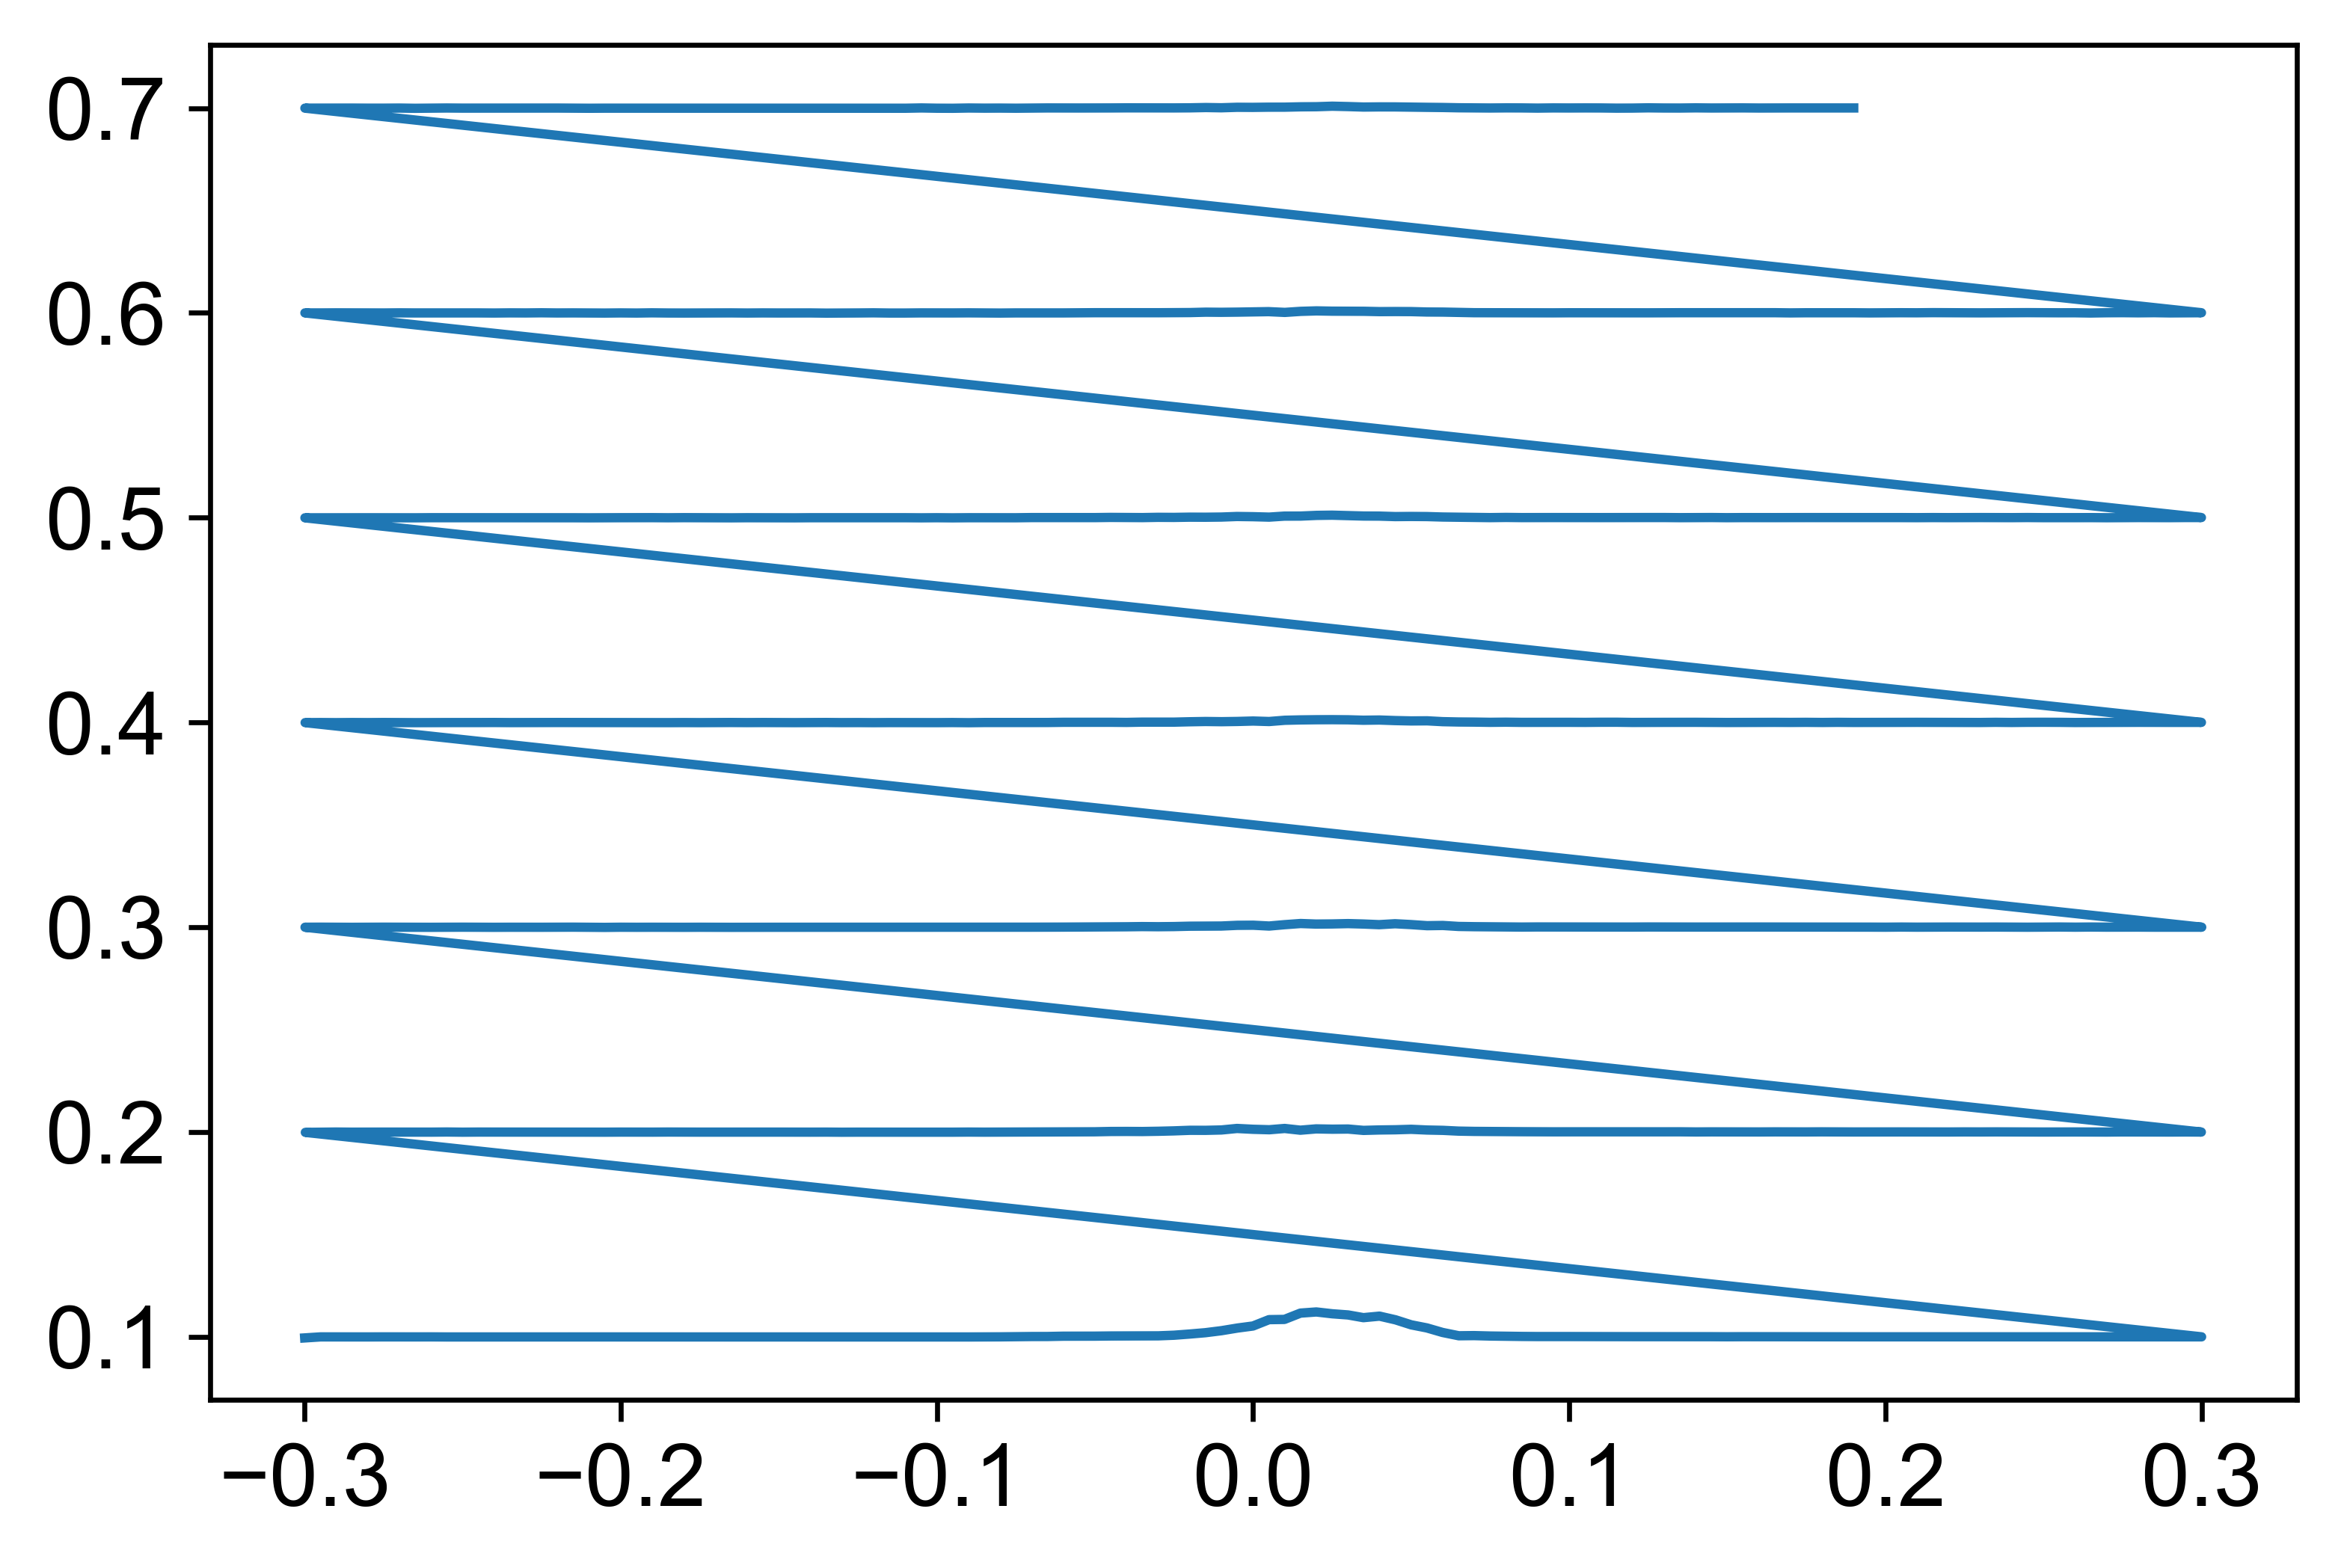

In [7]:
plt.plot(experiment.scanall.monodfconcatenated.index, experiment.scanall.monodfconcatenated.Temperature)

# Split the Scan3D Object into a bunch of Scan2D Objects, according to the outmost sweep channel value

In [8]:
experiment.splitDataByOutmostIndex(7, 'threshold', [(0.05, 0.18), (0.18, 0.25), (0.25, 0.35),\
                                                (0.35, 0.45), (0.45, 0.55), (0.55, 0.65), (0.65, 0.75)])

Dividing Scanall into a list of Scan2D Objects


100%|██████████| 7/7 [00:00<00:00, 60.62it/s]


# Create pivottables and perform differentiation for each Scan2D Object

In [53]:
experiment.createPivotTable(parameters = dict(x = 'AI2', y = 'AI7', num_of_points = 1000,\
                                                 auto_xrange = False, xmin = -1e-7, xmax = 1e-7,\
                                                 lowpass_filter = False, cutoff = 60, fs = 1000,\
                                                 remove_repeated_x = True))

Building Pivot Table


100%|██████████| 121/121 [00:05<00:00, 23.02it/s]


Building Pivot Table


100%|██████████| 121/121 [00:05<00:00, 23.61it/s]


Building Pivot Table


100%|██████████| 121/121 [00:05<00:00, 23.42it/s]


Building Pivot Table


100%|██████████| 121/121 [00:05<00:00, 23.83it/s]


Building Pivot Table


100%|██████████| 121/121 [00:05<00:00, 24.04it/s]


Building Pivot Table


100%|██████████| 121/121 [00:04<00:00, 24.21it/s]


Building Pivot Table


100%|██████████| 99/99 [00:04<00:00, 24.16it/s]


In [54]:
experiment.differentiateTable(parameters = dict(columnstep = 20, columninter = 2, rowstep = 0, rowinter = 1))

Differentiating Pivot Table against Column


100%|██████████| 121/121 [00:03<00:00, 37.13it/s]


Differentiating Pivot Table against Column


100%|██████████| 121/121 [00:03<00:00, 37.35it/s]


Differentiating Pivot Table against Column


100%|██████████| 121/121 [00:03<00:00, 37.34it/s]


Differentiating Pivot Table against Column


100%|██████████| 121/121 [00:03<00:00, 37.49it/s]


Differentiating Pivot Table against Column


100%|██████████| 121/121 [00:03<00:00, 37.23it/s]


Differentiating Pivot Table against Column


100%|██████████| 121/121 [00:03<00:00, 37.44it/s]


Differentiating Pivot Table against Column


100%|██████████| 99/99 [00:02<00:00, 37.85it/s]


# Plot

In [56]:
for i in range(7):
    plot2 = ProcessandPlot.intensityPlot(experiment.scan2Dlist[i].pivottabledX, zmin = 0, zmax = 5,
                             zscale = 1e-3, yscale = 1e4, xscale = 1e9, colorscale = 'Plasma',
                             xlabel = 'I (nA)', ylabel = 'B (oe)', zlabel = 'R (kOhm)', title = 'T = ' + str(experiment.outmostindexlist[i]),
                             width = 700, height = 600)
    plot2.show()

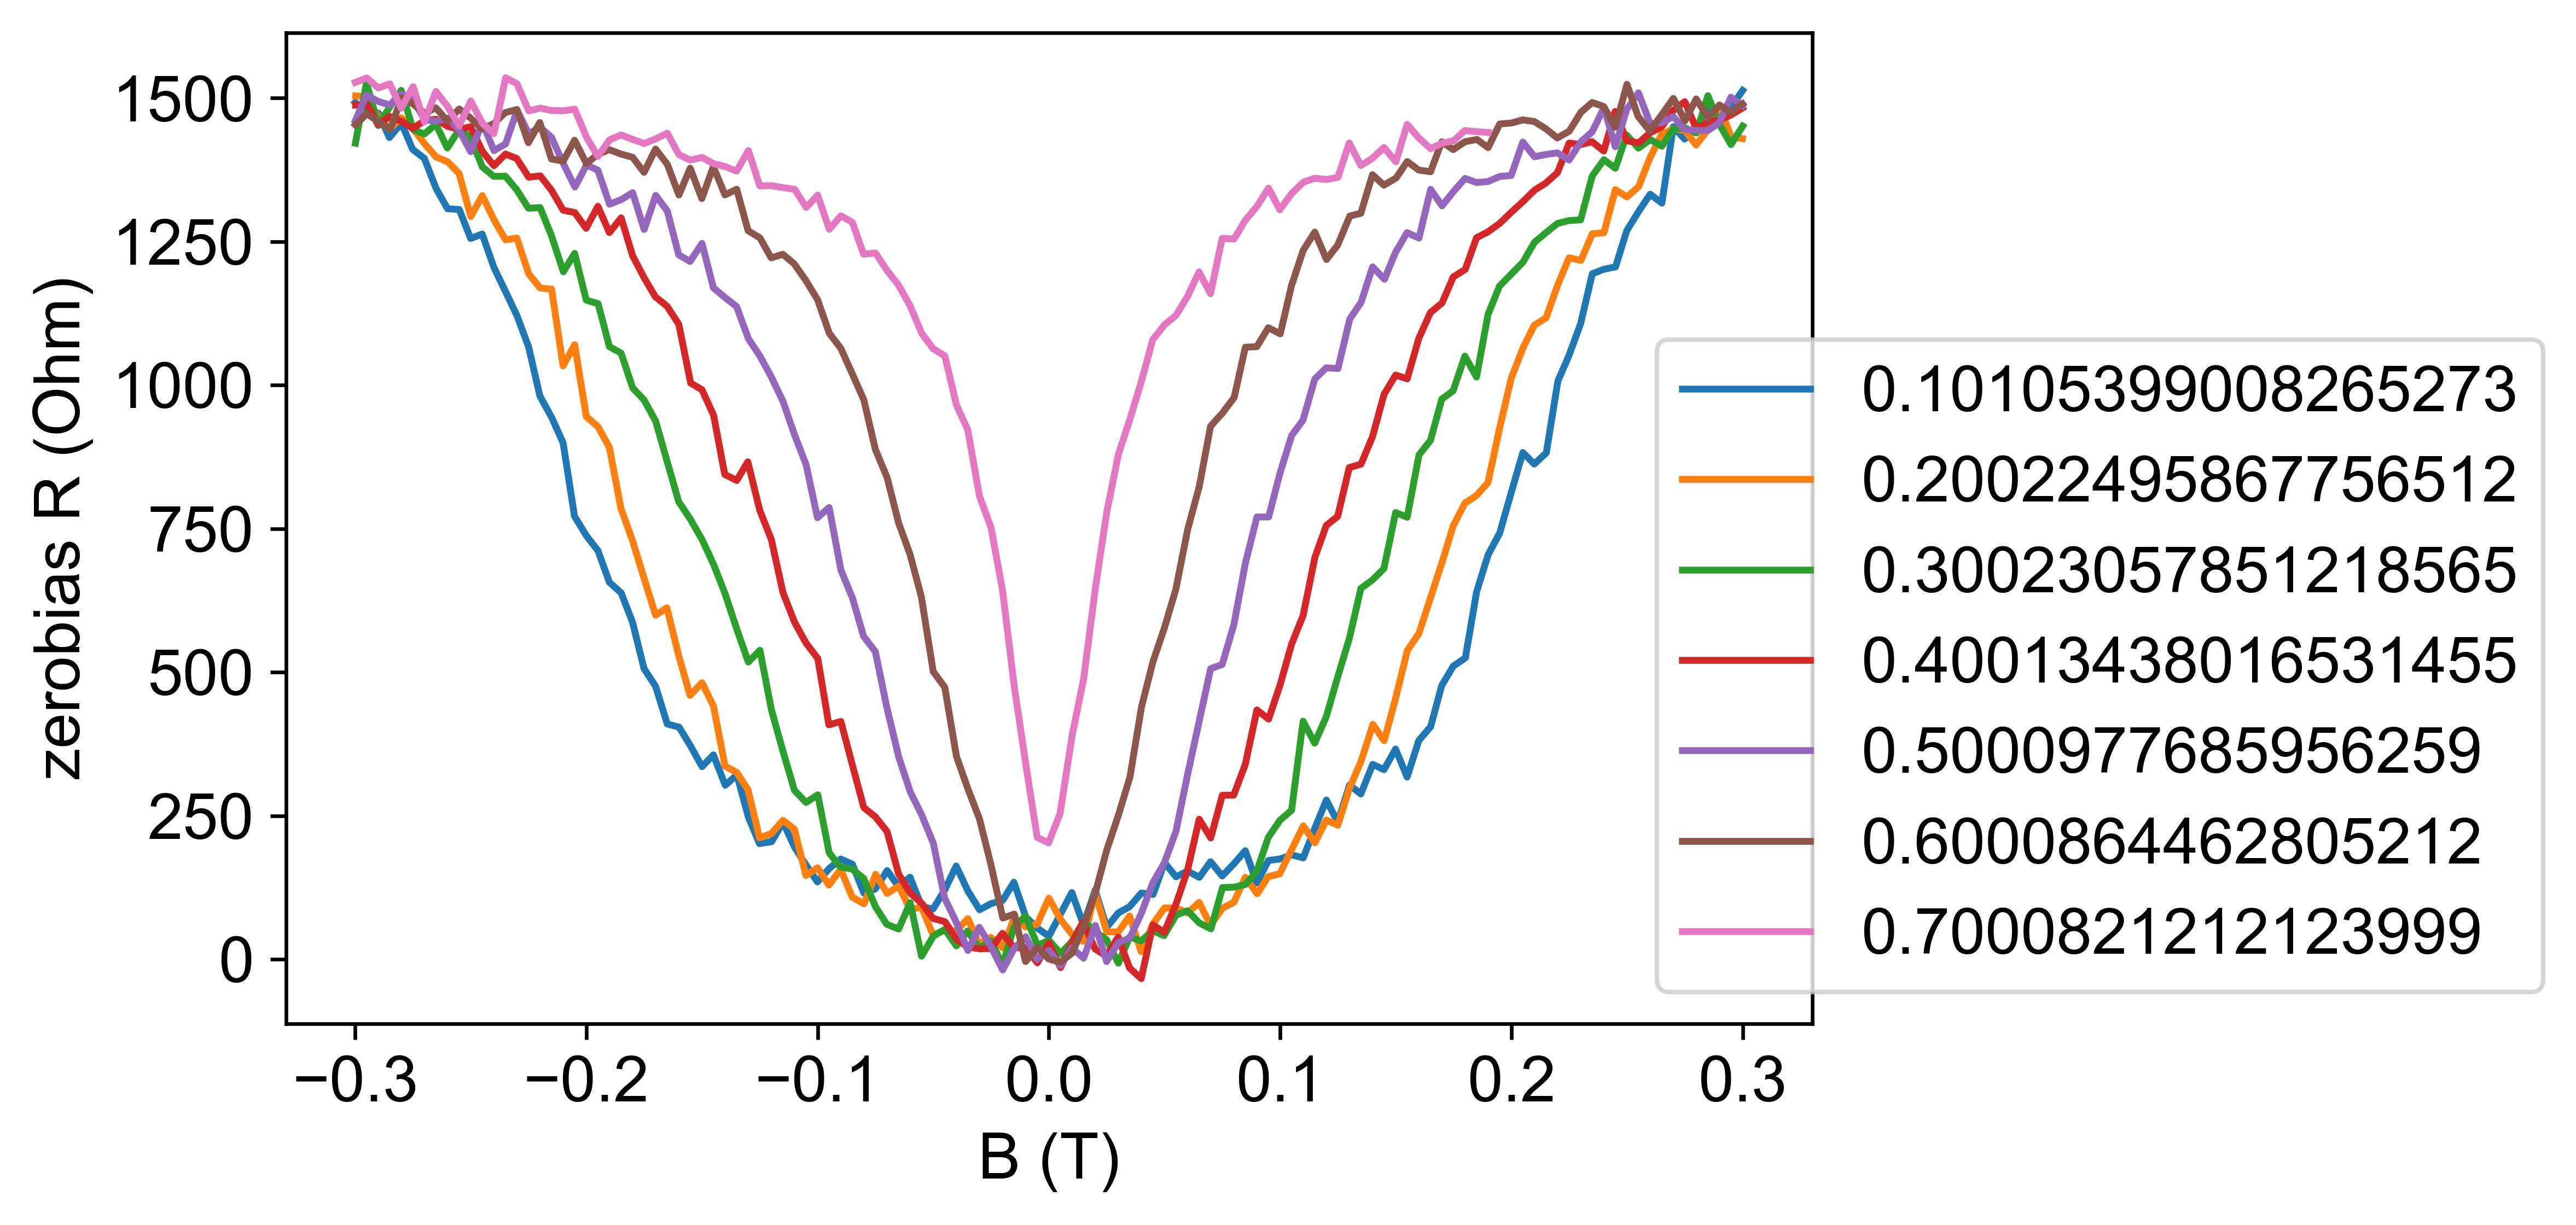

In [57]:
for i in range(7):
    temp = experiment.scan2Dlist[i].pivottabledX.iloc[:, 245]
    plt.plot(temp)

plt.xlabel('B (T)')
plt.ylabel('zerobias R (Ohm)')
plt.legend(experiment.outmostindexlist, bbox_to_anchor = (0, 0, 1.5, 1))
    

# Save the processed Scan3D Object

In [ ]:
experiment.saveToPickles()